<a href="https://colab.research.google.com/github/DmitryKostin/data-analysis-projects/blob/main/01_cash_flow_financial_stability_analysis/cash_flow_financial_stability_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ влияния денежных потоков на финансовую устойчивость компании в сфере телекоммуникаций

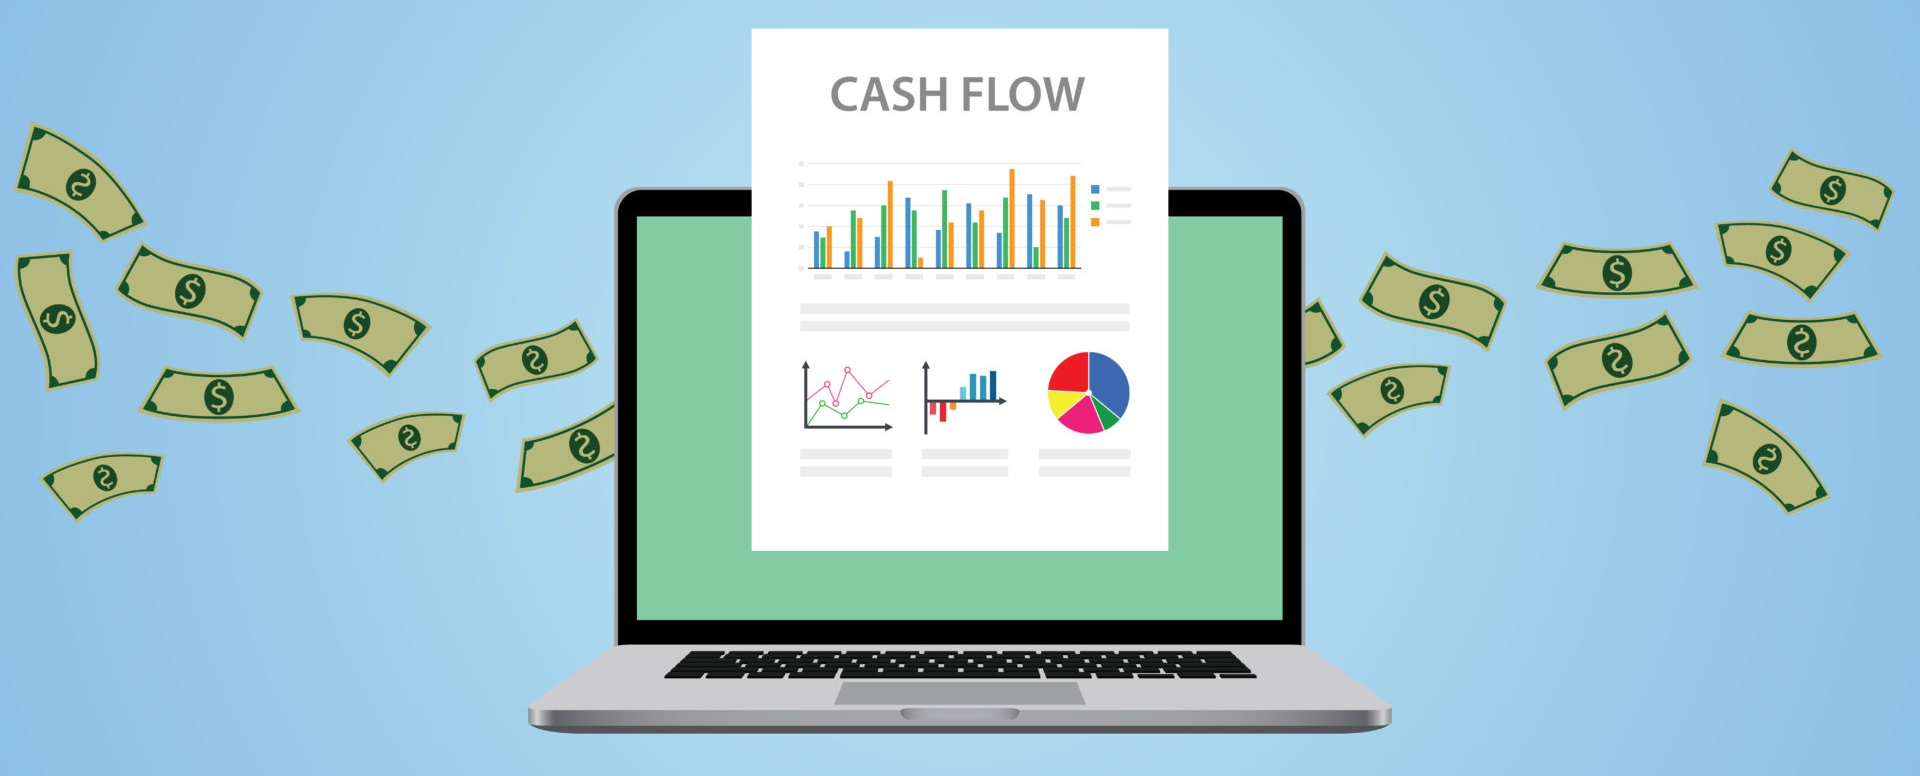

**Содержание** <a class='anchor' id='table_of_contents'></a>

* [Описание проекта](#description) 
* [Ход исследования](#research)
* [Описание данных](#data)
* [Шаг 1. Загрузка и подготовка данных](#step_1)
* [Шаг 2. Расчет коэффициентов равномерности распределения](#step_2)
* [Шаг 3. Расчет коэффициентов корреляции](#step_3)
* [Шаг 4. Визуализация результатов](#step_4)
* [Шаг 5. Сравнение с конкурентами](#step_5)
* [Выводы](#final)

## Описание проекта <a class='anchor' id='description'></a>

В проекте проводится обзор современных тенденций развития рынка телекоммуникационных услуг Российской Федерации и рассматриваются ведущие компании отрасли. Исследуется влияние процесса управления денежными потоками на финансовую устойчивость предприятий на основе финансовых аналитических показателей. 

В рамках настоящей работы были исследованы четыре ведущие телекоммуникационные компании России, в число которых вошли «Билайн», «МегаФон», «МТС» и «Ростелеком».

**Цель** - оценить влияние эффективного управления денежными потоками на финансовую устойчивость компании. 

**Исходные данные** - финансовая отчетность в РСБУ компаний из открытых источников, охватывающая
пятилетний период с 2013 по 2017 гг.

Исследование основано на моей научной статье *«Эффективное управление денежными потоками как фактор финансовой устойчивости предприятия в сфере телекоммуникаций»*:

* [Оригинал](https://nbviewer.org/github/DmitryKostin/my-scientific-articles/blob/main/01_cash_flow_research_article/cash_flow_research_article.ipynb) статьи в Jupyter NBViewer, [репозиторий](https://github.com/DmitryKostin/my-scientific-articles) с моими научными статьями на GitHub
* [PDF-версия](https://github.com/DmitryKostin/my-scientific-articles/blob/main/02_cash_flow_research_article/cash_flow_research_journal.pdf) публикации в журнале «Молодой ученый». — 2019. — № 34 (272). — С. 109-125.
* [Оригинал](https://moluch.ru/archive/272/62075/) статьи на сайте журнала «Молодой ученый».
* [PDF-версия]() публикации в сборнике материалов [Десятой Международной научно-практической конференции](https://smao.ru/information/metodiki_i_publikatsii_/otsenochnaya_deyatelnost_/25_let_otsenochnoy_deyatelnosti_traektoriya_razvitiya) *«25 лет оценочной деятельности в РФ: траектория развития»*. Полная версия [сборника](http://assn.by/wp-content/uploads/2018/12/11112312.pdf) материалов.

## Ход исследования <a class='anchor' id='research'></a>

На основе данных бухгалтерских балансов были рассчитаны абсолютные и относительные показатели финансовой устойчивости каждой компании.

Далее, на основе отчетов о движении денежных средств были рассчитаны коэффициенты равномерности распределения шести видов денежных потоков, в число которых входят положительные и отрицательные потоки от операционной, инвестиционной и финансовой деятельности. В процессе расчетов рассмотренные потоки были сгруппированы в трехлетние интервалы 2013‒2015, 2014‒2016, 2015‒2017 гг., последний год которых исследовался в разрезе финансовой устойчивости. 

Формула расчета __коэффициента равномерности распределения денежного потока__ имеет следующий вид:

$$ К = 1 - \frac{\sigma}{CF} \\ $$ 

 где $ CF $ – средний денежный поток за период, 
       $ σ $ – среднеквадратичное отклонение денежного потока. 


На основе полученных шести коэффициентов равномерности распределения денежных потоков и 23 показателей финансовой устойчивости (11 абсолютных и 12 относительных) было рассчитано 138 коэффициентов парной корреляции для каждого исследуемого предприятия.

В ходе исследования определялась связь между показателями, характеризующими финансовую устойчивость ПАО «МТС» и его денежными потоками от операционной, инвестиционной и финансовой деятельности. Уровень связи определялся с помощью коэффициентов парной корреляции. 

## Описание данных <a class='anchor' id='data'></a>

* `cash_flows.csv` - данные о денежных потоках ПАО «МТС», собранные из финансовой отчетности компании
* `indicators.csv` - относительные финансовые показатели, вычисленные в рамках анализа финансового состояния компании на основе отчетности РСБУ
* `fin_stats.csv` - абсолютные финансовые показатели, собранные из бухгалтерского баланса компании
* `companies.csv` - данные о распределении коэффициентов корреляции в разрезе денежных потоков российских сотовых операторов

## Шаг 1. Загрузка и подготовка данных <a class='anchor' id='step_1'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

В переменную `cash_flows` загрузим данные о денежных потоках ПАО «МТС», собранные из финансовой отчетности компании.

In [3]:
cash_flows = pd.read_csv('cash_flows.csv', index_col=0)

In [4]:
cash_flows

,2017,2016,2015,2014,2013
Текущие операции: PosCF,285252,282154,283425,285175,267465
Текущие операции: NegCF,201202,183553,179150,184737,162979
Инвестиционные операции: PosCF,39880,75680,25256,42118,23988
Инвестиционные операции: NegCF,82905,127006,137014,113952,77172
Финансовые операции: PosCF,98052,98002,94639,64708,32372
Финансовые операции: NegCF,128895,152696,98882,83556,86879


В переменную `indicators` загрузим относительные финансовые показатели, вычисленные в рамках анализа финансового состояния компании на основе отчетности РСБУ.

In [5]:
indicators = pd.read_csv('indicators.csv', index_col=0)

In [6]:
indicators

,Показатель,2017,2016,2015
0,Коэффициент автономии (независимости) (КиР/ИБ),0.193,0.072,0.066
1,Коэффициент финансовой зависимости ((ДСО+КСО)/ИБ),0.807,0.928,0.934
2,Коэффициент соотношения заемных и собственных средств ((ДСО+КСО)/КиР),4.191,12.888,14.124
3,Коэффициент финансовой устойчивости ((КиР+ДСО)/ИБ),0.719,0.741,0.716
4,Доля краткосрочных кредитов и займов в заемном капитале (КК/(ДСО+КСО)),0.189,0.141,0.128
5,Доля расчетов с кредиторами в заемном капитале (КЗ/(ДСО+КСО)),0.149,0.126,0.164
6,Коэффициент соотношения мобильных и иммобилизованных средств (ОА/ВА),0.229,0.107,0.319
7,Коэффициент маневренности (СОС/КиР),-3.225,-11.545,-10.464
8,Коэффициент обеспеченности оборотных активов собственными оборотными средствами (СОС/ОА),-3.338,-8.599,-2.859
9,Коэффициент обеспеченности запасов собственными оборотными средствами (СОС/Зап),-961.652,-800.766,-489.996


В переменную `fin_stats` загрузим абсолютные финансовые показатели, собранные из бухгалтерского баланса компании.

In [7]:
fin_stats = pd.read_csv('fin_stats.csv', index_col=0)

In [8]:
fin_stats

,Финансовый показатель,2017,2016,2015
0,Капитал и резервы (собственный капитал),112120,35026,35494
1,Внеоборотные активы (за исключением финансовых вложений),473701,439413,406911
2,Собственные оборотные средства (1-2),-361581,-404387,-371417
3,Долгосрочные кредиты,290584,305895,331917
4,Наличие собственных и долгосрочных источников (3+4),-70997,-98492,-39500
5,Краткосрочные кредиты,88710,63454,64044
6,Наличие основных источников (5+6),17713,-35038,24544
7,Запасы,376,505,758
8,Излишек (+) или дефицит (-) собственных оборотных средств для формирования запасов ∆СОС (3-8),-361957,-404892,-372175
9,Излишек (+) или дефицит (-) собственных и долгосрочных источников для формирования запасов ∆СДИ (5-8),-71373,-98997,-40258


[Назад к содержанию](#table_of_contents)

## Шаг 2. Расчет коэффициентов равномерности распределения <a class='anchor' id='step_2'></a>

Используя датафрейм `cash_flows`, для начала вычислим среднеквадратичное отклонение для каждого денежного потока в 2015-2017 гг. и запишем значения в столбец `2017-2015_std`.

In [9]:
cash_flows['2017-2015_std'] = cash_flows[['2017', '2016', '2015']].std(axis=1, ddof=0)
cash_flows

,2017,2016,2015,2014,2013,2017-2015_std
Текущие операции: PosCF,285252,282154,283425,285175,267465,1271.524632
Текущие операции: NegCF,201202,183553,179150,184737,162979,9528.695340
Инвестиционные операции: PosCF,39880,75680,25256,42118,23988,21181.965998
Инвестиционные операции: NegCF,82905,127006,137014,113952,77172,23506.127206
Финансовые операции: PosCF,98052,98002,94639,64708,32372,1597.248954
Финансовые операции: NegCF,128895,152696,98882,83556,86879,22018.210559


Рассчитаем средние значения для каждого денежного потока в период 2015-2017 гг. и запишем их в столбец `2017-2015_mean`.

In [10]:
cash_flows['2017-2015_mean'] = cash_flows[['2017', '2016', '2015']].mean(axis=1)
cash_flows

,2017,2016,2015,2014,2013,2017-2015_std,2017-2015_mean
Текущие операции: PosCF,285252,282154,283425,285175,267465,1271.524632,283610.333333
Текущие операции: NegCF,201202,183553,179150,184737,162979,9528.695340,187968.333333
Инвестиционные операции: PosCF,39880,75680,25256,42118,23988,21181.965998,46938.666667
Инвестиционные операции: NegCF,82905,127006,137014,113952,77172,23506.127206,115641.666667
Финансовые операции: PosCF,98052,98002,94639,64708,32372,1597.248954,96897.666667
Финансовые операции: NegCF,128895,152696,98882,83556,86879,22018.210559,126824.333333


Согласно формуле, вычислим __коэффициенты равномерности распределения денежных потоков__ в период 2015-2017 гг. и запишем их в столбец `2017-2015_k`.

In [11]:
cash_flows['2017-2015_k'] = 1 - cash_flows['2017-2015_std'] / cash_flows['2017-2015_mean']
cash_flows

,2017,2016,2015,2014,2013,2017-2015_std,2017-2015_mean,2017-2015_k
Текущие операции: PosCF,285252,282154,283425,285175,267465,1271.524632,283610.333333,0.995517
Текущие операции: NegCF,201202,183553,179150,184737,162979,9528.695340,187968.333333,0.949307
Инвестиционные операции: PosCF,39880,75680,25256,42118,23988,21181.965998,46938.666667,0.548731
Инвестиционные операции: NegCF,82905,127006,137014,113952,77172,23506.127206,115641.666667,0.796733
Финансовые операции: PosCF,98052,98002,94639,64708,32372,1597.248954,96897.666667,0.983516
Финансовые операции: NegCF,128895,152696,98882,83556,86879,22018.210559,126824.333333,0.826388


Выполним аналогичные вычисления коэффициентов равномерности распределения для остальных периодов и запишем их в соответствующие столбцы `2016-2014_k` и `2015-2013_k`.

In [12]:
# 2016-2014
cash_flows['2016-2014_std'] = cash_flows[['2016', '2015', '2014']].std(axis=1, ddof=0)
cash_flows['2016-2014_mean'] = cash_flows[['2016', '2015', '2014']].mean(axis=1)
cash_flows['2016-2014_k'] = 1 - cash_flows['2016-2014_std'] / cash_flows['2016-2014_mean']

# 2015-2013
cash_flows['2015-2013_std'] = cash_flows[['2015', '2015', '2013']].std(axis=1, ddof=0)
cash_flows['2015-2013_mean'] = cash_flows[['2015', '2014', '2013']].mean(axis=1)
cash_flows['2015-2013_k'] = 1 - cash_flows['2015-2013_std'] / cash_flows['2015-2013_mean']

Отберем все вычисленные __коэффициенты равномерности распределения__, каждый из которых покрывает один из трехлетних периодов, и запишем данные в датафрейм `dist_matrix`.

In [13]:
dist_matrix = cash_flows[['2017-2015_k', '2016-2014_k', '2015-2013_k']]
dist_matrix.columns = ['2017', '2016', '2015']

In [14]:
dist_matrix

,2017,2016,2015
Текущие операции: PosCF,0.995517,0.995633,0.973003
Текущие операции: NegCF,0.949307,0.986827,0.956594
Инвестиционные операции: PosCF,0.548731,0.560478,0.980372
Инвестиционные операции: NegCF,0.796733,0.925055,0.742092
Финансовые операции: PosCF,0.983516,0.825544,0.540688
Финансовые операции: NegCF,0.826388,0.734599,0.936971


[Назад к содержанию](#table_of_contents)

## Шаг 3. Расчет коэффициентов корреляции <a class='anchor' id='step_3'></a>

Вычислим матрицу попарных коэффициентов корреляций `CorrMatrix`, основанную на конкатенации датафреймов `dist_matrix`, `fin_stats` и `indicators`.

Проведем транспонирование всех датафреймов в более удобный формат (ориентация по столбцам) перед конкатенацией и установим индексы с названиями показателей во избежание ошибок.

In [15]:
CorrMatrix = pd.concat([dist_matrix.T, 
                        indicators.set_index('Показатель').T, 
                        fin_stats.set_index('Финансовый показатель').T], axis=1).corr()

In [16]:
CorrMatrix.iloc[6:, :6].style.format('{:.3f}')

,Текущие операции: PosCF,Текущие операции: NegCF,Инвестиционные операции: PosCF,Инвестиционные операции: NegCF,Финансовые операции: PosCF,Финансовые операции: NegCF
Коэффициент автономии (независимости) (КиР/ИБ),0.532,-0.618,-0.556,-0.185,0.799,-0.095
Коэффициент финансовой зависимости ((ДСО+КСО)/ИБ),-0.532,0.618,0.556,0.185,-0.799,0.095
Коэффициент соотношения заемных и собственных средств ((ДСО+КСО)/КиР),-0.592,0.559,0.615,0.114,-0.840,0.167
Коэффициент финансовой устойчивости ((КиР+ДСО)/ИБ),0.596,0.957,-0.573,0.983,0.271,-0.893
Доля краткосрочных кредитов и займов в заемном капитале (КК/(ДСО+КСО)),0.662,-0.483,-0.683,-0.025,0.885,-0.254
Доля расчетов с кредиторами в заемном капитале (КЗ/(ДСО+КСО)),-0.802,-0.833,0.785,-0.994,-0.537,0.985
Коэффициент соотношения мобильных и иммобилизованных средств (ОА/ВА),-0.822,-0.813,0.805,-0.990,-0.565,0.990
Коэффициент маневренности (СОС/КиР),0.389,-0.736,-0.415,-0.341,0.691,0.066
Коэффициент обеспеченности оборотных активов собственными оборотными средствами (СОС/ОА),-0.567,-0.967,0.544,-0.976,-0.237,0.877
Коэффициент обеспеченности запасов собственными оборотными средствами (СОС/Зап),-0.941,0.003,0.950,-0.459,-1.000,0.688


Извлечем из `CorrMatrix` только интересующие нас неповторяющиеся значения __коэффициентов парной корреляции__ и запишем их в датафрейм `data`.

In [17]:
data = CorrMatrix.iloc[6:, :6]

Избавимся от отрицательных значений, не имеющих особого экономического смысла, и преобразуем все значения датафрейма `data` в их значения по модулю.

In [18]:
data = data.apply(lambda x: abs(x))

Добавим новый столбец `mean`, в котором построчно рассчитаем средние значения коэффициентов. Далее, отсортируем датафрейм по столбцу `mean` по убыванию.

In [19]:
data['mean'] = data.mean(axis=1)
data = data.sort_values(by=['mean'], ascending=False)
data.head().style.format('{:.3f}')

,Текущие операции: PosCF,Текущие операции: NegCF,Инвестиционные операции: PosCF,Инвестиционные операции: NegCF,Финансовые операции: PosCF,Финансовые операции: NegCF,mean
Наличие собственных и долгосрочных источников (3+4),0.887,0.734,0.874,0.964,0.664,1.000,0.854
Излишек (+) или дефицит (-) собственных и долгосрочных источников для формирования запасов ∆СДИ (5-8),0.885,0.737,0.871,0.966,0.661,1.000,0.853
Коэффициент соотношения мобильных и иммобилизованных средств (ОА/ВА),0.822,0.813,0.805,0.990,0.565,0.990,0.831
Доля расчетов с кредиторами в заемном капитале (КЗ/(ДСО+КСО)),0.802,0.833,0.785,0.994,0.537,0.985,0.823
Коэффициент финансовой устойчивости ((КиР+ДСО)/ИБ),0.596,0.957,0.573,0.983,0.271,0.893,0.712


[Назад к содержанию](#table_of_contents)

## Шаг 4. Визуализация результатов <a class='anchor' id='step_4'></a>

Создадим график `Correlation Heatmap`, в котором отобразим тепловую карту, основанную на значениях коэффициентов попарной корреляции.

In [20]:
data = data.drop(columns='mean')

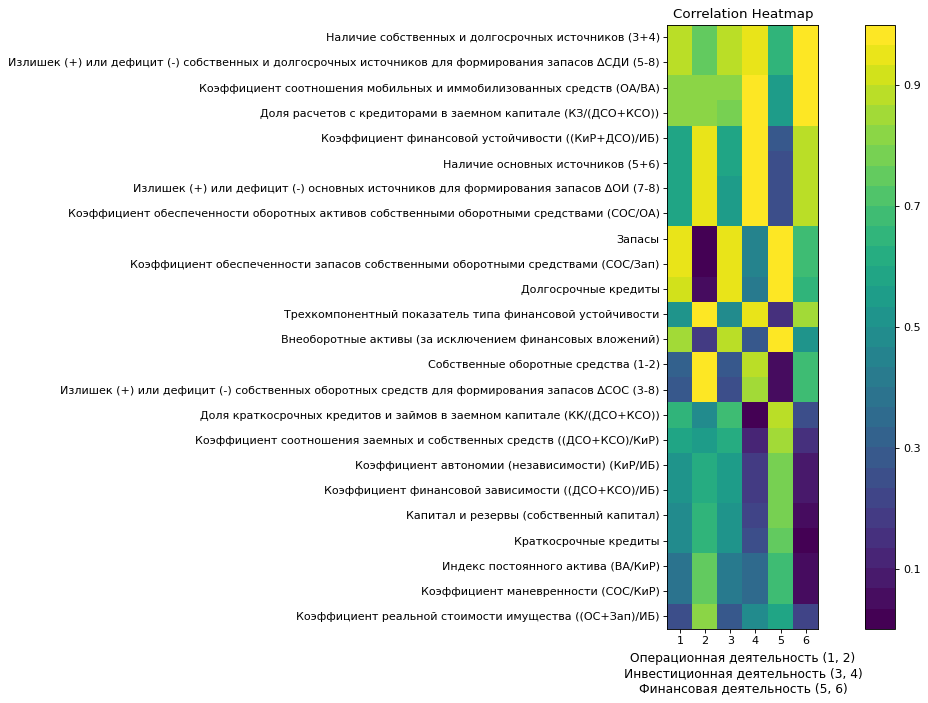

In [21]:
fig = plt.figure(figsize=(15, 10), dpi=80)
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('viridis', 30)
cax = ax1.imshow(data, interpolation='nearest', cmap=cmap)
ax1.grid(False)
plt.title('Correlation Heatmap')
labels = [1, 2, 3, 4, 5, 6]
ax1.set_xticklabels(labels=labels, fontsize=10)
ax1.set_yticklabels(labels=data.index, fontsize=10)
ax1.set_yticks(list(range(24)))
ax1.set_xticks(list(range(6)))
fig.colorbar(cax, ticks=[0.10, .30, .50, .70, .90 , 1])
ax1.set_xlabel("Операционная деятельность (1, 2)\nИнвестиционная деятельность (3, 4)\nФинансовая деятельность (5, 6)", 
               fontsize=11, labelpad=5)
plt.show()

Как видно из графика, показатели можно разделить на несколько групп по признаку схожей степени и структуре их корреляции.

__Первая группа__ с наиболее высокой корреляцией: 
* Наличие собственных и долгосрочных источников
* Наличие (дефицит) собственных и долгосрочных источников для формирования запасов ∆СДИ
* Коэффициент соотношения мобильных и иммобилизованных средств
* Доля расчетов с кредиторами в заемном капитале

__Вторая группа__ с высокой корреляцией:
* Коэффициент финансовой устойчивости
* Наличие основных источников
* Наличие (дефицит) основных источников для формирования запасов ∆ОИ
* Коэффициент обеспеченности оборотных активов собственными оборотными средствами

Данная группа характеризуется низкой корреляцией с положительными денежными потоками от всех видов деятельности и высокой корреляцией с отрицательными денежными потоками. 
Данные зависимости указывают, на что влияют основные расходы компании.

__Третья группа__ со средней корреляцией:
* Запасы
* Коэффициент обеспеченности запасов собственными оборотными средствами
* Долгосрочные кредиты

Данная группа характеризуется высокой корреляцией с положительными денежными потоками от всех видов деятельности и низкой корреляцией с отрицательными денежными потоками.

Также, можно выделить группу __с низкой и отсутствующей корреляцией__ из нижней части графика, состоящей в большей степени из финансовых коэффициентов.
Важно отметить, что на такие важнейшие статьи баланса, как __Капитал и резервы__ и __Краткросрочные кредиты__, управление денежными потоками не оказывает влияния.

Распределим коэффициенты корреляции по степени влияния и подсчитаем их количество в каждой категории.

In [22]:
data['> 0.9'] = data.iloc[:, :6].apply(lambda row: len([i for i in row if i > 0.9]), axis=1)
data['0.7-0.9'] = data.iloc[:, :6].apply(lambda row: len([i for i in row if 0.9 > i >= 0.7]), axis=1)
data['0.5-0.7'] = data.iloc[:, :6].apply(lambda row: len([i for i in row if 0.7 > i >= 0.5]), axis=1)
data['0.3-0.5'] = data.iloc[:, :6].apply(lambda row: len([i for i in row if 0.5 > i >= 0.3]), axis=1)
data['< 0.3'] = data.iloc[:, :6].apply(lambda row: len([i for i in row if 0.3 > i]), axis=1)

In [23]:
data.head()

,Текущие операции: PosCF,Текущие операции: NegCF,Инвестиционные операции: PosCF,Инвестиционные операции: NegCF,Финансовые операции: PosCF,Финансовые операции: NegCF,> 0.9,0.7-0.9,0.5-0.7,0.3-0.5,< 0.3
Наличие собственных и долгосрочных источников (3+4),0.886997,0.733787,0.873553,0.964410,0.664399,0.999896,2,3,1,0,0
Излишек (+) или дефицит (-) собственных и долгосрочных источников для формирования запасов ∆СДИ (5-8),0.884748,0.737072,0.871184,0.965680,0.660768,0.999814,2,3,1,0,0
Коэффициент соотношения мобильных и иммобилизованных средств (ОА/ВА),0.821893,0.813389,0.805418,0.990003,0.565149,0.990147,2,3,1,0,0
Доля расчетов с кредиторами в заемном капитале (КЗ/(ДСО+КСО)),0.802038,0.832708,0.784788,0.994228,0.536756,0.984810,2,3,1,0,0
Коэффициент финансовой устойчивости ((КиР+ДСО)/ИБ),0.595722,0.957011,0.572719,0.982928,0.270635,0.892898,2,1,2,0,1


In [24]:
total_values = {'> 0.9': data['> 0.9'].sum(),
                '0.7-0.9': data['0.7-0.9'].sum(),
                '0.5-0.7': data['0.5-0.7'].sum(),
                '0.3-0.5': data['0.3-0.5'].sum(),
                '< 0.3': data['< 0.3'].sum()}

pd.DataFrame.from_dict(total_values, orient='index').rename(columns={0:'Всего коэффициентов'})

,Всего коэффициентов
> 0.9,30
0.7-0.9,30
0.5-0.7,37
0.3-0.5,15
< 0.3,32


Построим круговую диаграмму для отображения соотношения коэффициентов корреляции.

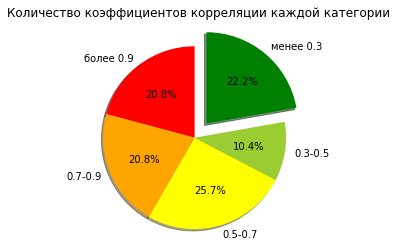

In [25]:
labels = 'более 0.9', '0.7-0.9', '0.5-0.7', '0.3-0.5', 'менее 0.3'
sizes = [total_values[i] for i in total_values]
explode = (0, 0, 0, 0, 0.2)  
colors = ['red', 'orange', 'yellow', 'yellowgreen', 'green']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Количество коэффициентов корреляции каждой категории')
plt.show()

Более 25% коэффициентов корреляции относятся к категории умеренной зависимости (0.5-0.7).

Подсчитаем количество коэффициентов в разрезе денежных потоков.

In [26]:
values_cnt = {'Текущие операции: PosCF': [],
              'Текущие операции: NegCF': [],
              'Инвестиционные операции: PosCF': [],
              'Инвестиционные операции: NegCF': [],
              'Финансовые операции: PosCF': [],
              'Финансовые операции: NegCF': []}

for i in data.iloc[:, :6]:
    values_cnt[i].append(data[i].apply(lambda x: 1 if 0.3 > x else 0).sum())
    values_cnt[i].append(data[i].apply(lambda x: 1 if 0.5 > x >= 0.3 else 0).sum())
    values_cnt[i].append(data[i].apply(lambda x: 1 if 0.7 > x >= 0.5 else 0).sum())
    values_cnt[i].append(data[i].apply(lambda x: 1 if 0.9 > x >= 0.7 else 0).sum())
    values_cnt[i].append(data[i].apply(lambda x: 1 if x > 0.9 else 0).sum())

pd.DataFrame.from_dict(values_cnt, orient='index',
                      columns=['< 0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', '> 0.9'])

,< 0.3,0.3-0.5,0.5-0.7,0.7-0.9,> 0.9
Текущие операции: PosCF,2,5,9,5,3
Текущие операции: NegCF,4,1,5,7,7
Инвестиционные операции: PosCF,3,3,10,5,3
Инвестиционные операции: NegCF,7,6,0,2,9
Финансовые операции: PosCF,7,0,7,6,4
Финансовые операции: NegCF,9,0,6,5,4


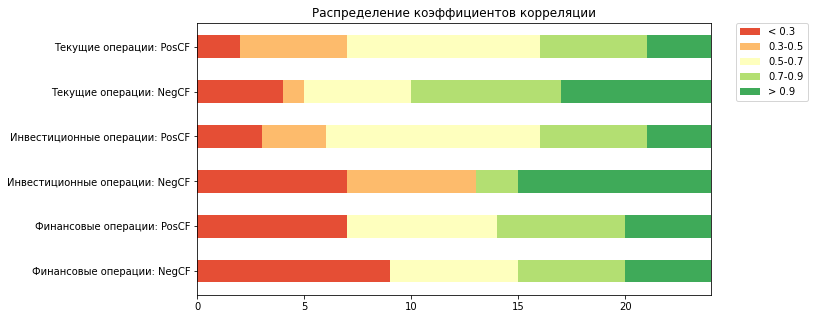

In [27]:
category_names = ['< 0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', '> 0.9']

labels = cash_flows.index
data_all = np.array(list(values_cnt.values()))
data_cum = data_all.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data_all.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(True)
ax.set_xlim(0, np.sum(data_all, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data_all[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

ax.legend(bbox_to_anchor=(1.05, 1),
          loc='upper left', 
          borderaxespad=0., 
          fontsize='medium')
plt.title('Распределение коэффициентов корреляции')
plt.show()

Мы видим, что коэффициенты распределены равномерно внутри каждого денежного потока, относительно сохраняя пропорции.

[Назад к содержанию](#table_of_contents)

## Шаг 5. Сравнение с конкурентами <a class='anchor' id='step_5'></a>

Подводя итоги, следует отметить, что изначально анализируемые предприятия имели разные финансовые состояния, разные стратегии финансового менеджмента и объемы основной деятельности. Единой объединяющей тенденцией, которая была характерна для каждой компании, безусловно, стало существенное влияние на финансовую устойчивость потоков от финансовой деятельности. В их состав входят получаемые предприятием кредиты, займы и обслуживание обязательств, которые изменяют структуру баланса и капиталов, вместе с чем напрямую влияют на показатели финансовой устойчивости. Вне зависимости снижались или повышались объемы данных потоков, в каждом случае коэффициенты корреляции показывали наиболее высокие значения.
Потоки от операционной деятельности, в состав который входят самые основные затраты и доходы коммерческой деятельности, зачастую демонстрировали неоднозначное поведение: при снижении поступлений и при повышении расходов потоки основной деятельности сильно снижали степень корреляции, по-прежнему провоцируя негативную динамику большинства коэффициентов финансовой устойчивости.

In [28]:
companies = pd.read_csv('companies.csv', index_col=0)
companies

,Операционная деятельность (PosCF),Операционная деятельность (NegCF),Инвестиционная деятельность (PosCF),Инвестиционная деятельность (NegCF),Финансовая деятельность (PosCF),Финансовая деятельность (NegCF)
Билайн,0.52,0.84,0.70,0.83,0.86,0.78
Мегафон,0.86,0.39,0.86,0.37,0.82,0.86
МТС,0.62,0.61,0.62,0.61,0.62,0.54
Ростелеком,0.86,0.54,0.77,0.78,0.75,0.72


Также распространенной тенденцией среди операторов оказалось существенное снижение объемов инвестиционных потоков на протяжении пяти последних лет. Однако, несмотря на это, данные потоки оказывали разное влияние на состояния компаний, демонстрируя как максимально высокую корреляцию, так и ее полное отсутствие.

Проведенное исследование полностью подтвердило факт наличия высокой зависимости между процессом управления денежными потоками, его эффективностью и финансовой устойчивостью предприятия. Распределение денежных потоков организации многогранным и неоднозначным образом влияет на все стороны ее финансового состояния. Это подтверждает тезис о том, насколько важным и актуальным остается инструментарий финансового менеджмента в целом, при правильном использовании которого можно контролировать и регулировать все финансовые аспекты предприятия.

**Структура распределения коэффициентов корреляции в разрезе денежных потоков среди всех исследуемых предприятий**

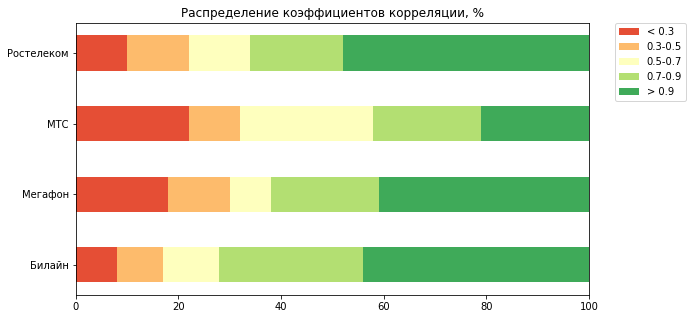

In [29]:
category_names = ['< 0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', '> 0.9']

results = {
    'Ростелеком': [10, 12, 12, 18, 48],
    'МТС': [22, 10, 26, 21, 21],
    'Мегафон': [18, 12, 8, 21, 41],
    'Билайн': [8, 9, 11, 28, 44]
}


labels = list(results.keys())
data_all = np.array(list(results.values()))
data_cum = data_all.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data_all.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(True)
ax.set_xlim(0, np.sum(data_all, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data_all[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

ax.legend(bbox_to_anchor=(1.05, 1),
          loc='upper left', 
          borderaxespad=0., 
          fontsize='medium')
plt.title('Распределение коэффициентов корреляции, %')

plt.show()

[Назад к содержанию](#table_of_contents)

## Выводы <a class='anchor' id='final'></a>

1. «МТС» в трех прошедших периодах имеет относительно стабильную финансовую неустойчивость с уверенной положительной динамикой большинства относительных и абсолютных коэффициентов финансовой устойчивости. Управление денежными потоками показало наименьшую корреляцию среди всех исследованных компаний – коэффициент корреляции более 0,9 в абсолютном значении присутствовал лишь в 26,4% исследованных связей, а значения в промежутке 0,7–0,9 составили лишь 16,7%. Данную тенденцию подтверждает факт наличия самого высокого числа связей с отсутствием корреляции – 20,1%. Средний коэффициент корреляции ПАО «МТС» составил 0,6067, что является самым низким значением среди конкурентов.

2. Оценивая влияние в разрезе денежных потоков, следует отметить, что наибольшую роль в изменении финансовой устойчивости компании сыграли отрицательные потоки операционной и инвестиционной деятельностей. Нетипично низкую корреляцию продемонстрировали потоки финансовой деятельности, которые обычно имеют сильное влияние на динамику финансовой устойчивости. В данном случае платежи в рамках финансовой деятельности ПАО «МТС» имеют самое низкое влияние – около 40% связей данного потока имеет корреляцию менее 0,3, что отличает компанию от всех конкурентов.

3. Наблюдается тенденция, в которой коэффициенты автономии (+191,3%), финансовой зависимости (–13,5%), маневренности (+69,2%), соотношения заемных и собственных средств (–70,3%) и индекс постоянного актива (–63,1%), демонстрирующие положительную динамику для финансовой устойчивости, имеют высокую корреляцию только с положительным денежным потоком от финансовой деятельности. Предприятие смещало акцент с долгосрочных заимствований на краткосрочные (доля краткосрочных кредитов выросла на 47,8% за последние 3 года), в связи с чем объемы данного денежного потока снижались. Это позволило укрепить финансовую устойчивость – высокие значения корреляции также подтверждают данную тенденцию (0,737–0,873). Отрицательную динамику коэффициента обеспеченности оборотных активов собственными оборотными средствами (–16,7%) с наиболее высокой степенью корреляции (0,89‒0,99) вызывали исключительно все оттоки денежных средств. 

4. Отрицательную же динамику коэффициента обеспеченности запасов собственными оборотными средствами (–96,3%), напротив, с высокой корреляцией (0,94‒0,99) обеспечивали только притоки от всех видов деятельности.

5. У «МТС», также как и у других компаний, в структуре управления денежными потоками более 67% поступлений средств происходит от основной деятельности. Притоки от финансовой деятельности являются наименьшими среди конкурентов, достигая только 23%.

6. Инвестиционная деятельность компании приносит лишь 9% средств всех денежных притоков. Аналогичная ситуация наблюдается и с отрицательными денежными потоками, где 49% затрат приходится на основную деятельность и 31% – на обслуживание обязательств в рамках финансовой деятельности.

Учитывая положительные изменения финансовой устойчивости и наиболее низкое влияние управления денежными потоками на него, можно сделать вывод, что компания проводит уверенный и эффективный финансовый менеджмент.

[Назад к содержанию](#table_of_contents)